In [6]:
import torch
import torch.nn as nn
class MinPool2d(nn.Module):
    def __init__(self, kernel_size, stride=None, padding=0):
        super(MinPool2d, self).__init__()
        self.kernel_size = kernel_size
        self.stride = stride if stride is not None else kernel_size
        self.padding = padding

    def forward(self, x):
        # 反转输入张量以使用最大池化
        x_neg = -x
        return -nn.functional.max_pool2d(x_neg, self.kernel_size, self.stride, self.padding)

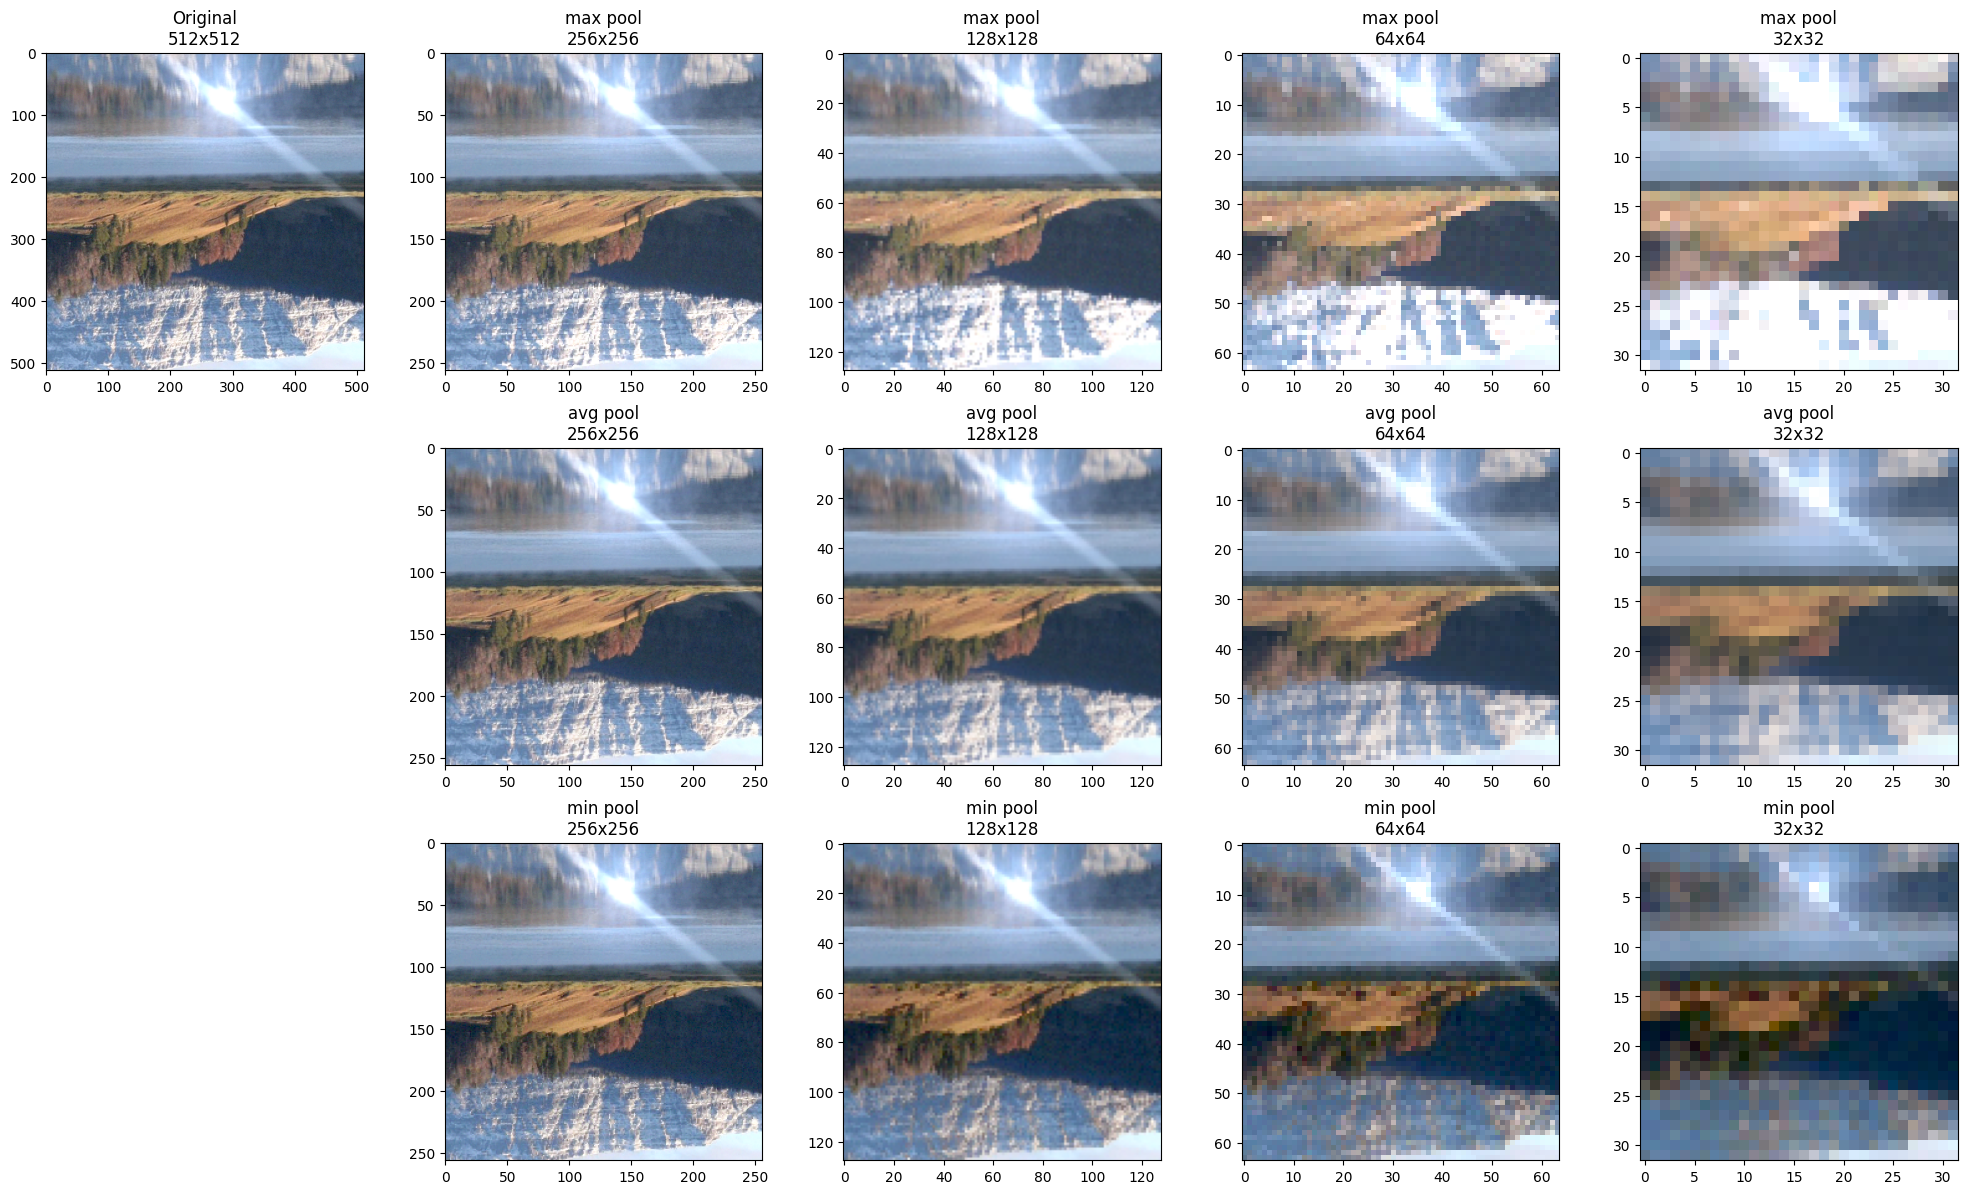

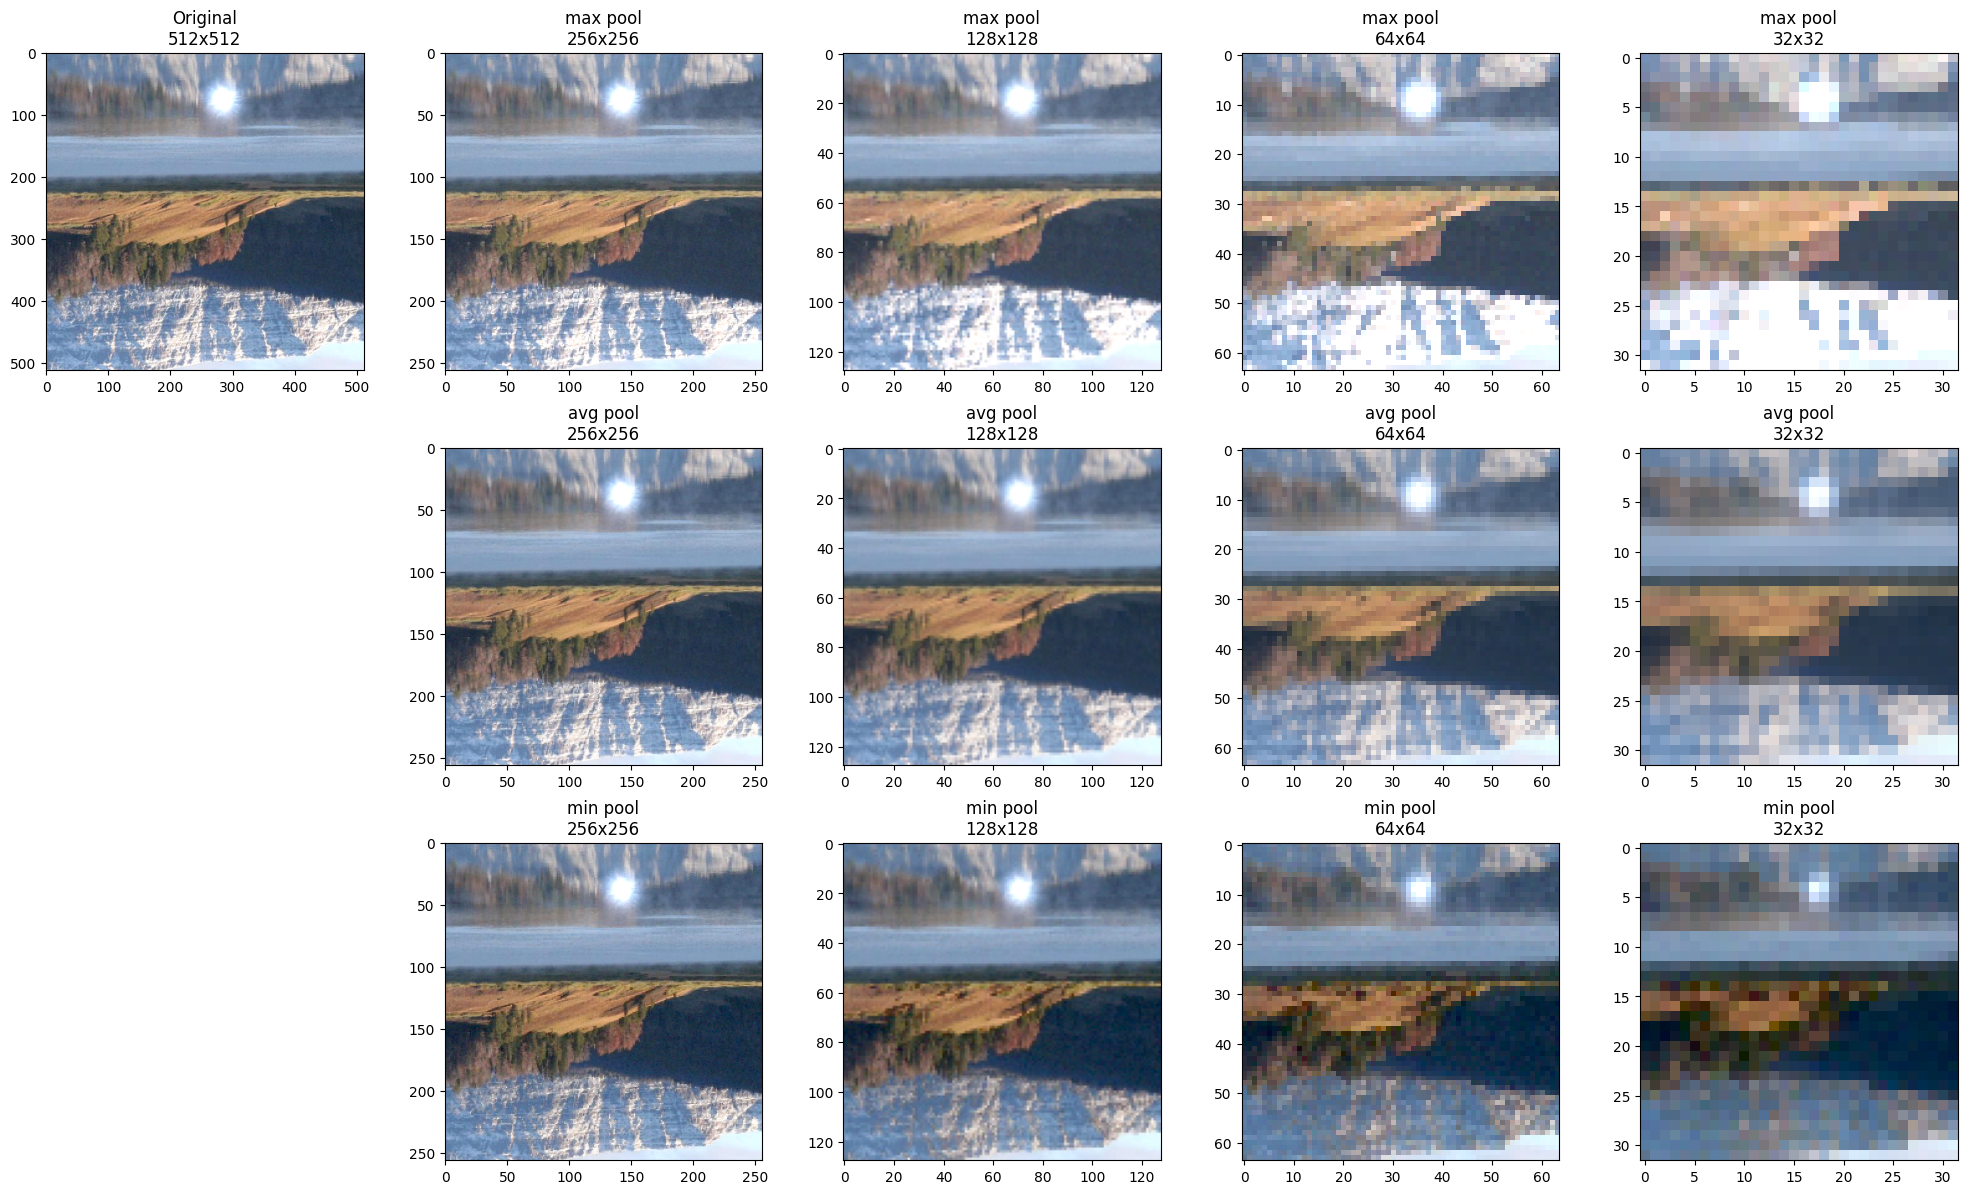

In [7]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

# 1. 从本地读取图片并缩放到512x512
def load_and_resize_image(image_path, size=(512, 512)):
    # 打开图片
    img = Image.open(image_path)
    
    # 定义转换：转为Tensor并归一化到[0,1]
    transform = transforms.Compose([
        transforms.Resize(size),
        transforms.ToTensor()
    ])
    
    # 应用转换
    img_tensor = transform(img)
    
    # 如果是灰度图，增加通道维度
    if img_tensor.shape[0] == 1:
        img_tensor = img_tensor.repeat(3, 1, 1)
    
    return img_tensor

# 替换为你的图片路径
image_path = "D:/My_project_temps/python/try1/dataset/flare7kpp_local/input/c1/5.png"  # 请修改为你的图片路径
image_tensor = load_and_resize_image(image_path)

# 2. 定义池化操作
def apply_pooling(image, pool_type='max', kernel_size=2, stride=2):
    """应用池化操作"""
    # 增加batch维度 (1, C, H, W)
    image = image.unsqueeze(0)
    
    if pool_type == 'max':
        pool = nn.MaxPool2d(kernel_size, stride)
    elif pool_type == 'avg':
        pool = nn.AvgPool2d(kernel_size, stride)
    elif pool_type == 'min':
        # PyTorch没有直接的min pooling，我们可以通过-max(-x)来实现
        pool = MinPool2d(kernel_size, stride)
    else:
        raise ValueError("pool_type必须是'max', 'avg'或'min'")
    
    result = pool(image)
    
    # 移除batch维度
    return result.squeeze(0)

# 3. 生成并展示图像
def plot_pooling_results(image_tensor, rows=3, cols=5):
    """展示不同池化操作的结果"""
    fig, axes = plt.subplots(rows, cols, figsize=(20, 12))
    
    pool_types = ['max', 'avg', 'min']
    current_size = image_tensor.shape[1]  # 初始高度/宽度
    
    for row, pool_type in enumerate(pool_types):
        # 第一列显示原始图像
        if row == 0:
            img_np = image_tensor.permute(1, 2, 0).numpy()  # CHW to HWC
            axes[row, 0].imshow(img_np)
            axes[row, 0].set_title(f"Original\n{current_size}x{current_size}")
        
        # 其他行第一列空白
        else:
            axes[row, 0].axis('off')
        
        # 应用池化并显示结果
        pooled_img = image_tensor.clone()
        for col in range(1, cols):
            pooled_img = apply_pooling(pooled_img, pool_type)
            current_size = pooled_img.shape[1]
            
            # 转换为numpy并显示
            img_np = pooled_img.permute(1, 2, 0).numpy()
            axes[row, col].imshow(img_np)
            axes[row, col].set_title(f"{pool_type} pool\n{current_size}x{current_size}")
    
    plt.tight_layout()
    plt.show()

# 执行展示
plot_pooling_results(image_tensor)

image_path = "D:/My_project_temps/python/try1/dataset/flare7kpp_local/gt/c1/5.png"  # 请修改为你的图片路径
image_tensor = load_and_resize_image(image_path)
plot_pooling_results(image_tensor)

检测到Alpha通道，正在移除...


C:\Users\90828\AppData\Local\Temp\ipykernel_24456\2715512083.py:68: UserWarning: Glyph 21407 (\N{CJK UNIFIED IDEOGRAPH-539F}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\90828\AppData\Local\Temp\ipykernel_24456\2715512083.py:68: UserWarning: Glyph 22987 (\N{CJK UNIFIED IDEOGRAPH-59CB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\90828\AppData\Local\Temp\ipykernel_24456\2715512083.py:68: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\90828\AppData\Local\Temp\ipykernel_24456\2715512083.py:68: UserWarning: Glyph 20687 (\N{CJK UNIFIED IDEOGRAPH-50CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\90828\AppData\Local\Temp\ipykernel_24456\2715512083.py:68: UserWarning: Glyph 28784 (\N{CJK UNIFIED IDEOGRAPH-7070}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\90828\AppData\Local\Temp\ipykernel_24456\2715512083.py:68: UserWarning: Glyph 24230 (\

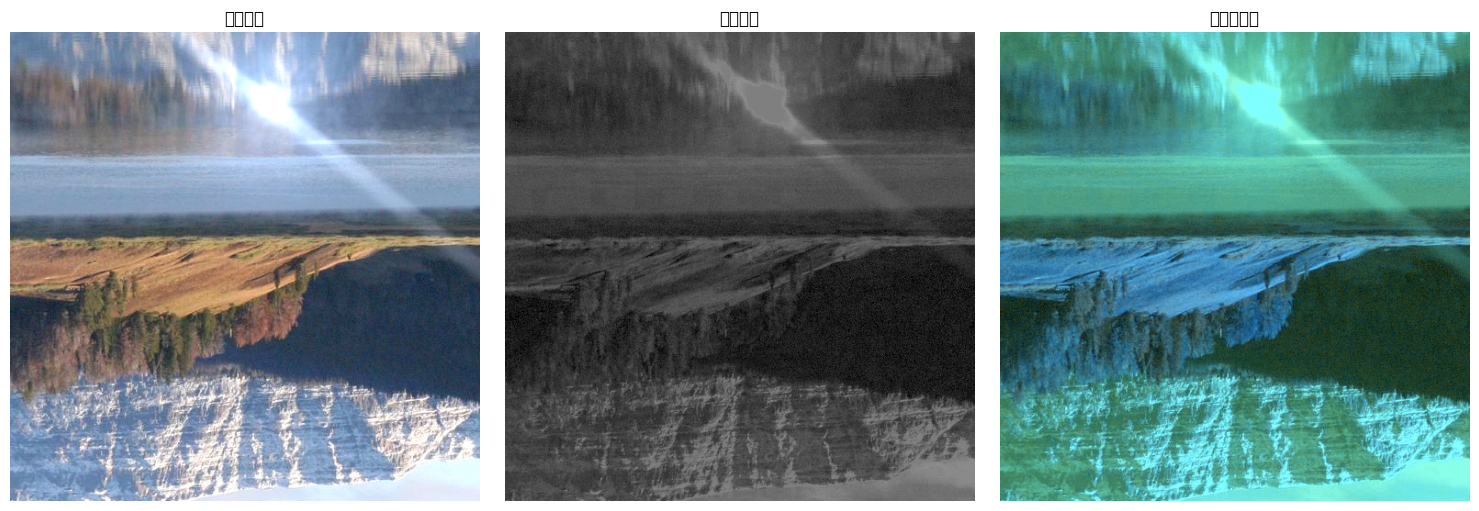

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def rgb_to_infrared(image_path, output_path=None, show_result=True):
    """
    将RGB/RGBA图像转换为红外效果
    
    参数:
        image_path: 输入图像路径
        output_path: 输出图像保存路径(可选)
        show_result: 是否显示转换结果
    
    返回:
        转换后的红外图像数组
    """
    try:
        # 读取图像并转换为numpy数组
        img = Image.open(image_path)
        img_array = np.array(img)
        
        # 检查并处理Alpha通道
        if len(img_array.shape) == 3 and img_array.shape[2] == 4:
            print("检测到Alpha通道，正在移除...")
            # 提取RGB通道并丢弃Alpha
            rgb_img = img_array[:, :, :3]
            # 可选：使用白色背景合成（如果Alpha是透明度）
            # alpha = img_array[:, :, 3:] / 255.0
            # rgb_img = rgb_img * alpha + 255 * (1 - alpha)
            # rgb_img = rgb_img.astype(np.uint8)
        elif len(img_array.shape) == 3 and img_array.shape[2] == 3:
            rgb_img = img_array
        else:
            raise ValueError("输入图像必须是RGB或RGBA格式")
        
        # 红外转换 - 增强绿色通道并减弱红色和蓝色通道
        # 公式：红外强度 = 1.5*绿色 - 0.5*红色 - 0.5*蓝色
        infrared_gray = (1.5 * rgb_img[:, :, 1] - 0.5 * rgb_img[:, :, 0] - 0.5 * rgb_img[:, :, 2])
        
        # 将值缩放到0-255范围并转换为8位无符号整数
        infrared_gray = np.clip(infrared_gray, 0, 255).astype(np.uint8)
        
        # 创建伪彩色红外效果（模拟彩色红外摄影）
        false_color = np.zeros_like(rgb_img)
        false_color[:, :, 0] = infrared_gray  # 红色通道=红外强度
        false_color[:, :, 1] = rgb_img[:, :, 1]  # 绿色通道=原始绿色
        false_color[:, :, 2] = rgb_img[:, :, 0]  # 蓝色通道=原始红色
        
        if show_result:
            # 显示原始和转换后的图像
            plt.figure(figsize=(15, 5))
            
            plt.subplot(1, 3, 1)
            plt.imshow(rgb_img)
            plt.title('原始图像')
            plt.axis('off')
            
            plt.subplot(1, 3, 2)
            plt.imshow(infrared_gray, cmap='gray', vmin=0, vmax=255)
            plt.title('灰度红外')
            plt.axis('off')
            
            plt.subplot(1, 3, 3)
            plt.imshow(false_color)
            plt.title('伪彩色红外')
            plt.axis('off')
            
            plt.tight_layout()
            plt.show()
        
        # 保存结果
        if output_path:
            Image.fromarray(false_color).save(output_path)
            print(f"红外图像已保存至: {output_path}")
        
        return false_color
    
    except Exception as e:
        print(f"处理图像时出错: {str(e)}")
        return None

# 使用示例
# 替换为你的图像路径
input_image = "D:/My_project_temps/python/try1/dataset/flare7kpp_local/input/c1/5.png"  # 请修改为你的图片路径
# 转换图像
infrared_result = rgb_to_infrared(input_image)

In [ ]:
# 导入必要的库
import torch
import torch.nn as nn
import torch.fft
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from ipywidgets import interact, FloatSlider
import warnings
warnings.filterwarnings('ignore')

# 设置matplotlib在Notebook中显示
%matplotlib inline

# 1. 读取图片
# 请将图片路径替换为您自己的图片路径
image_path = 'your_image.jpg'  # 修改为您的图片路径
image = Image.open(image_path).convert('L')  # 转换为灰度图
image_tensor = torch.from_numpy(np.array(image)).float() / 255.0

# 检查图片是否成功加载
if image_tensor is None:
    raise ValueError("图片加载失败，请检查路径是否正确")

# 2. 定义可学习的滤波器类
class LearnableFilter(nn.Module):
    def __init__(self, size, filter_type='lowpass'):
        super(LearnableFilter, self).__init__()
        self.filter_type = filter_type
        
        # 创建可学习的参数
        if filter_type == 'lowpass':
            # 初始化低通滤波器（高斯形状）
            center = size // 2
            y, x = torch.meshgrid(torch.arange(size), torch.arange(size))
            dist = torch.sqrt((x - center)**2 + (y - center)**2)
            initial_filter = torch.exp(-dist**2 / (2 * (size/6)**2))
        else:  # highpass
            # 初始化高通滤波器（拉普拉斯形状）
            center = size // 2
            y, x = torch.meshgrid(torch.arange(size), torch.arange(size))
            dist = torch.sqrt((x - center)**2 + (y - center)**2)
            initial_filter = 1 - torch.exp(-dist**2 / (2 * (size/6)**2))
        
        self.filter = nn.Parameter(initial_filter.unsqueeze(0).unsqueeze(0))
        
    def forward(self, x):
        # 应用滤波器
        return x * self.filter

# 3. 定义处理函数
def process_image(lowpass_strength=1.0, highpass_strength=1.0):
    # 获取图像尺寸
    h, w = image_tensor.shape
    
    # 傅里叶变换并shift
    fft = torch.fft.fft2(image_tensor)
    fft_shifted = torch.fft.fftshift(fft)
    
    # 创建滤波器实例
    lowpass_filter = LearnableFilter(min(h, w), 'lowpass')
    highpass_filter = LearnableFilter(min(h, w), 'highpass')
    
    # 设置滤波器强度
    lowpass_filter.filter.data = lowpass_filter.filter.data * lowpass_strength
    highpass_filter.filter.data = highpass_filter.filter.data * highpass_strength
    
    # 应用滤波器
    lowpass_fft = lowpass_filter(fft_shifted.unsqueeze(0).unsqueeze(0)).squeeze()
    highpass_fft = highpass_filter(fft_shifted.unsqueeze(0).unsqueeze(0)).squeeze()
    
    # 计算剩余部分
    residual_fft = fft_shifted - lowpass_fft - highpass_fft
    
    # 逆shift和逆傅里叶变换
    lowpass_ishift = torch.fft.ifftshift(lowpass_fft)
    lowpass_image = torch.abs(torch.fft.ifft2(lowpass_ishift))
    
    highpass_ishift = torch.fft.ifftshift(highpass_fft)
    highpass_image = torch.abs(torch.fft.ifft2(highpass_ishift))
    
    residual_ishift = torch.fft.ifftshift(residual_fft)
    residual_image = torch.abs(torch.fft.ifft2(residual_ishift))
    
    # 创建图形和子图
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    
    # 显示原图
    axes[0].imshow(image_tensor.numpy(), cmap='gray')
    axes[0].set_title('原图')
    axes[0].axis('off')
    
    # 显示低频特征
    axes[1].imshow(lowpass_image.numpy(), cmap='gray')
    axes[1].set_title('低频特征')
    axes[1].axis('off')
    
    # 显示高频特征
    axes[2].imshow(highpass_image.numpy(), cmap='gray')
    axes[2].set_title('高频特征')
    axes[2].axis('off')
    
    # 显示剩余部分特征
    axes[3].imshow(residual_image.numpy(), cmap='gray')
    axes[3].set_title('剩余部分特征')
    axes[3].axis('off')
    
    plt.tight_layout()
    plt.show()

# 4. 创建交互式控件
interact(process_image, 
         lowpass_strength=FloatSlider(min=0.1, max=2.0, step=0.1, value=1.0, description='低通强度'),
         highpass_strength=FloatSlider(min=0.1, max=2.0, step=0.1, value=1.0, description='高通强度'))